# POS Tagger based on CRF

## # Required Modules

In [2]:
import random
from sklearn_crfsuite import CRF
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

## # Dataset loading

In [28]:
def features(sentence, index):
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit()
    }

In [85]:
files_all = ["guj_art and culture_sample1.txt", "guj_economy_sample2.txt", "guj_entertainment_sample3.txt", "guj_philosophy_sample4.txt", "guj_religion_sample5.txt", "guj_science and technology_sample6.txt", "guj_sports_sample7.txt"]
word_sentences = []
tag_sentences = []

files = [files_all[6]]

for file_ in files:
    file = open("./dataset/" + file_, "r")
    contents = file.read().split('\n')

    for i in range(1,len(contents)):
        # s = contents[i][10:]
        s = contents[i].split('\t')[1]
        words = []
        tags = []
        for ss in s.split(' '):
            if len(ss.split('\\')) != 2:
                continue
            word = ss.split('\\')[0]
            tag = ss.split('\\')[1]
            words.append(word)
            tags.append(tag)
        word_sentences.append(words)
        tag_sentences.append(tags)

    file.close()

# X = word_sentences
# Y = tag_sentences
    
X = []
Y = []
for sentence, tags in zip(word_sentences, tag_sentences):
    X.append([features(sentence, index) for index in range(len(sentence))])
    Y.append([tag for tag in tags])
print(X[1])
print(Y[1])

[{'word': 'ભારતનો', 'is_first': True, 'is_last': False, 'prefix-1': 'ભ', 'prefix-2': 'ભા', 'prefix-3': 'ભાર', 'suffix-1': 'ો', 'suffix-2': 'નો', 'suffix-3': 'તનો', 'prev_word': '', 'next_word': 'ઑસ્ટ્રેલિયા', 'has_hyphen': False, 'is_numeric': False}, {'word': 'ઑસ્ટ્રેલિયા', 'is_first': False, 'is_last': False, 'prefix-1': 'ઑ', 'prefix-2': 'ઑસ', 'prefix-3': 'ઑસ્', 'suffix-1': 'ા', 'suffix-2': 'યા', 'suffix-3': 'િયા', 'prev_word': 'ભારતનો', 'next_word': 'સામે', 'has_hyphen': False, 'is_numeric': False}, {'word': 'સામે', 'is_first': False, 'is_last': False, 'prefix-1': 'સ', 'prefix-2': 'સા', 'prefix-3': 'સામ', 'suffix-1': 'ે', 'suffix-2': 'મે', 'suffix-3': 'ામે', 'prev_word': 'ઑસ્ટ્રેલિયા', 'next_word': 'આઠ', 'has_hyphen': False, 'is_numeric': False}, {'word': 'આઠ', 'is_first': False, 'is_last': False, 'prefix-1': 'આ', 'prefix-2': 'આઠ', 'prefix-3': 'આઠ', 'suffix-1': 'ઠ', 'suffix-2': 'આઠ', 'suffix-3': 'આઠ', 'prev_word': 'સામે', 'next_word': 'વિકેટથી', 'has_hyphen': False, 'is_numeric': Fa

## # Split dataset into Train-Test (80%-20%)

In [86]:
indexlist = random.sample(range(0, len(X)), int(len(X)*0.2))

X_test = []
Y_test = []
X_train = []
Y_train = []

for i in range(len(X)):
    if i in indexlist:
        X_test.append(X[i])
        Y_test.append(Y[i])
    else:
        X_train.append(X[i])
        Y_train.append(Y[i])

print('Train len ',len(X_train))
print('Test len ',len(X_test))

Train len  800
Test len  200


## # Init CRF Model

In [87]:
crf = CRF(algorithm = 'lbfgs',
    c1 = 0.001,
    c2 = 0.001,
    max_iterations = 1000,
    all_possible_transitions=True)

In [88]:
crf.fit(X_train, Y_train)

CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.001, c2=0.001,
    keep_tempfiles=None, max_iterations=1000)

## # Finding Accuracy Score

In [90]:
def accuracy(tag_sentences_test, test_tag_pred):
    correct_prediction = wrong_prediction = total_predictions = total_word = 0
    passed = 0
    for tag_true, tag_pred in zip(tag_sentences_test, test_tag_pred):
        for pred, actual in zip(tag_pred, tag_true):
            if pred == actual:
                correct_prediction += 1
            else:
                wrong_prediction += 1
            total_predictions += 1
    
    print('Correct pred ', correct_prediction)
    print('Wrong pred ', wrong_prediction)
    print('Total word ', total_predictions)
    return correct_prediction / total_predictions
 
# X1, Y1 = X_train, Y_train  # train
X1, Y1 = X_test, Y_test    # test
Y_pred = crf.predict(X1)
print("accuracy score :", round(accuracy(Y1, Y_pred),4))

Correct pred  2664
Wrong pred  275
Total word  2939
accuracy score : 0.9064


## # Results comparisions

### # Accuracy Score: CRF (Without Features)
| Dataset | Train Data Accuracy | Test Data Accuracy |
| --- | --- | --- |
| guj_art and culture_sample1.txt | 0.7455 | 0.7217 |
| guj_economy_sample2.txt | 0.8154 | 0.7876 |
| guj_entertainment_sample3.txt | 0.7572 | 0.7016 |
| guj_philosophy_sample4.txt | 0.7877 | 0.7527 |
| guj_religion_sample5.txt | 0.7494 | 0.7235 |
| guj_science and technology_sample6.txt | 0.7335 | 0.7088 |
| guj_sports_sample7.txt | 0.7331 | 0.7089 |

### # Accuracy Score: CRF (With Features)
| Dataset | Train Data Accuracy | Test Data Accuracy |
| --- | --- | --- |
| guj_art and culture_sample1.txt | 0.9995 | 0.8962 |
| guj_economy_sample2.txt | 0.9996 | 0.9502 |
| guj_entertainment_sample3.txt | 0.9996 | 0.8841 |
| guj_philosophy_sample4.txt | 0.9997 | 0.9141 |
| guj_religion_sample5.txt | 0.9992 | 0.8747 |
| guj_science and technology_sample6.txt | 0.9998 | 0.9093 |
| guj_sports_sample7.txt | 0.9991 | 0.9064 |


### # Accuracy Score: HMM
| Dataset | Train Data Accuracy | Test Data Accuracy |
| --- | --- | --- |
| guj_art and culture_sample1.txt | 0.9801 | 0.7413 |
| guj_economy_sample2.txt | 0.9884 | 0.9061 |
| guj_entertainment_sample3.txt | 0.9716 | 0.7680 |
| guj_philosophy_sample4.txt | 0.9866 | 0.8674 |
| guj_religion_sample5.txt | 0.9770 | 0.7100 |
| guj_science and technology_sample6.txt | 0.9810 | 0.8532 |
| guj_sports_sample7.txt | 0.9753 | 0.7824 |

### # Dataset Details
| Index | Dataset | Size (No. of sentences) |  Size (No. of words) | Train (No. of sentences) | Test (No. of sentences) |
| --- | --- | --- | --- | --- | --- |
| D1 | guj_art and culture_sample1.txt | 1000 | 16050 | 800 | 200 |
| D2 | guj_economy_sample2.txt | 1000 | 12467 | 800 | 200 |
| D3 | guj_entertainment_sample3.txt | 1000 | 11879 | 800 | 200 |
| D4 | guj_philosophy_sample4.txt | 1000 | 12904 | 800 | 200 |
| D5 | guj_religion_sample5.txt | 1000 | 12247 | 800 | 200 |
| D6 | guj_science and technology_sample6.txt | 1000 | 16857 | 800 | 200 |
| D7 | guj_sports_sample7.txt | 1000 | 14836 | 800 | 200 |

In [91]:
dataset = ["D1", "D2", "D3", "D4", "D5", "D6", "D7"]

train_acc_crf_wof = [0.7455, 0.8154, 0.7572, 0.7877, 0.7494, 0.7335, 0.7331]
test_acc_crf_wof = [0.7217, 0.7876, 0.7016, 0.7527, 0.7235, 0.7088, 0.7089]

train_acc_crf_wf = [0.9995, 0.9996, 0.9996, 0.9997, 0.9992, 0.9998, 0.9991]
test_acc_crf_wf = [0.8962, 0.9502, 0.8841, 0.9141, 0.8747, 0.9093, 0.9064]

train_acc_hmm = [0.9801, 0.9884, 0.9716, 0.9866, 0.9770, 0.9810, 0.9753]
test_acc_hmm = [0.7413, 0.9061, 0.7680, 0.8674, 0.7100, 0.8532, 0.7824]

### # CRF: Train Acc. v/s Test Acc.

#### # Without Features

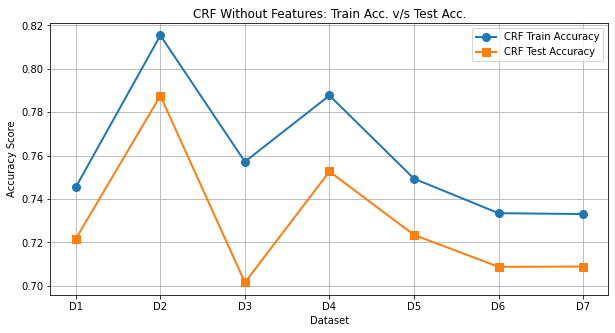

In [92]:
plt.figure(figsize=(10, 5))
plt.plot(dataset, train_acc_crf_wof, label = "CRF Train Accuracy", linewidth = 2, marker = 'o', markersize = 8) 
plt.plot(dataset, test_acc_crf_wof, label = "CRF Test Accuracy", linewidth = 2, marker = 's', markersize = 8) 
plt.title('CRF Without Features: Train Acc. v/s Test Acc.') 
plt.xlabel("Dataset")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid()
plt.show()

#### # With Features

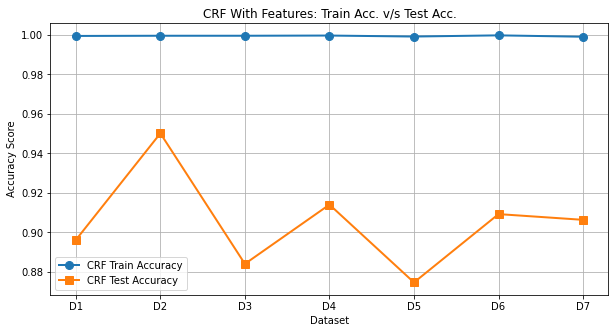

In [93]:
plt.figure(figsize=(10, 5))
plt.plot(dataset, train_acc_crf_wf, label = "CRF Train Accuracy", linewidth = 2, marker = 'o', markersize = 8) 
plt.plot(dataset, test_acc_crf_wf, label = "CRF Test Accuracy", linewidth = 2, marker = 's', markersize = 8) 
plt.title('CRF With Features: Train Acc. v/s Test Acc.') 
plt.xlabel("Dataset")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid()
plt.show()

### # HMM: Train Acc. v/s Test Acc.

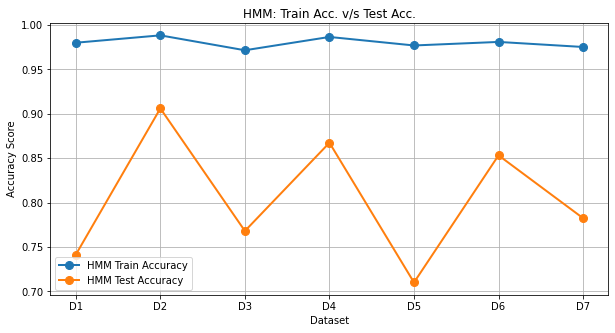

In [139]:
plt.figure(figsize=(10, 5))
plt.plot(dataset, train_acc_hmm, label = "HMM Train Accuracy", linewidth = 2, marker = 'o', markersize = 8) 
plt.plot(dataset, test_acc_hmm, label = "HMM Test Accuracy", linewidth = 2, marker = 'o', markersize = 8) 
plt.title('HMM: Train Acc. v/s Test Acc.') 
plt.xlabel("Dataset")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid()
plt.show()

### # HMM Train Acc. v/s CRF With Features Train Acc.

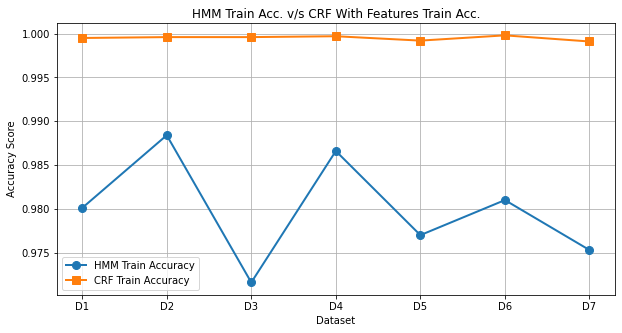

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(dataset, train_acc_hmm, label = "HMM Train Accuracy", linewidth = 2, marker = 'o', markersize = 8) 
plt.plot(dataset, train_acc_crf_wf, label = "CRF Train Accuracy", linewidth = 2, marker = 's', markersize = 8) 
plt.title('HMM Train Acc. v/s CRF With Features Train Acc.') 
plt.xlabel("Dataset")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid()
plt.show()

### # HMM Test Acc. v/s CRF With Features Test Acc.

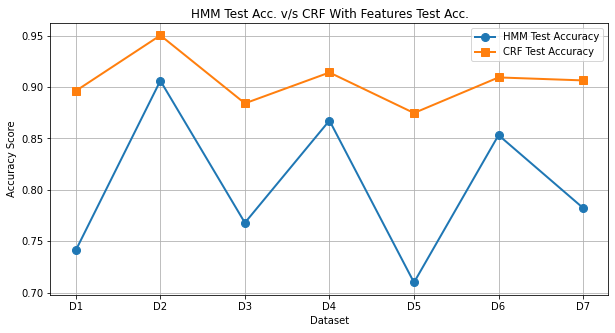

In [95]:
plt.figure(figsize=(10, 5))
plt.plot(dataset, test_acc_hmm, label = "HMM Test Accuracy", linewidth = 2, marker = 'o', markersize = 8) 
plt.plot(dataset, test_acc_crf_wf, label = "CRF Test Accuracy", linewidth = 2, marker = 's', markersize = 8) 
plt.title('HMM Test Acc. v/s CRF With Features Test Acc.') 
plt.xlabel("Dataset")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid()
plt.show()